In [2]:
import keras 


from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib

import matplotlib.pyplot as plt



Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [3]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

print(X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [4]:
num_pixels=(X_train.shape[1]*X_train.shape[2])
print(num_pixels)

784


In [5]:
X_train=(X_train.reshape(X_train.shape[0],num_pixels))/255
X_test=X_test.reshape(X_test.shape[0],num_pixels)/255

print(X_train.shape)

(60000, 784)


In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
num_classes=y_train.shape[1]

In [8]:
model=Sequential()
model.add(Dense(num_pixels,activation="relu",input_shape=(num_pixels,)))
model.add(Dense(150,activation="relu"))
model.add(Dense(num_classes,activation="sigmoid"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
model.fit(X_train,y_train,epochs=5)
predict=model.predict(X_test)

Epoch 1/5
60000/60000 [==============================] - 251s 4ms/step - loss: 0.1975 - acc: 0.9394
Epoch 2/5
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0824 - acc: 0.9751
Epoch 3/5
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0579 - acc: 0.9824
Epoch 4/5
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0412 - acc: 0.9866
Epoch 5/5
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0329 - acc: 0.9895


In [10]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 7s 699us/step


[0.07915300441090949, 0.9791]

array([4.2980175e-09, 9.9788862e-01, 4.0852022e-08, 3.5140990e-10,
       2.9076893e-06, 1.2951859e-10, 1.3411141e-08, 1.4498385e-04,
       6.9660082e-06, 3.0716012e-07], dtype=float32)

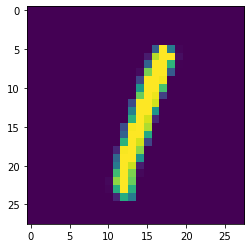

In [34]:
image=X_test[5].reshape(28,28)
plt.imshow(image)
predict=model.predict(X_test)
predict[5] #Categorical Output


In [ ]:
# So we have number "1" in the above Picture 
# In the Output we have maximum Probability for number "1"